In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Datasets//tmdb_cleaned.csv', index_col=0)

In [3]:
df.head()

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,title,vote_count,Profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['culture clash', 'future', 'space war', 'spac...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['US', 'United States of America', 'GB', 'Unit...",2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,11800,2550965087
1,300000000,"['Adventure', 'Fantasy', 'Action']","['ocean', 'drug abuse', 'exotic island', 'east...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...","['US', 'United States of America']",2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,4500,661000000
2,245000000,"['Action', 'Adventure', 'Crime']","['spy', 'based on novel', 'secret agent', 'seq...",en,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B']","['GB', 'United Kingdom', 'US', 'United States ...",2015-10-26,880674609,148.0,A Plan No One Escapes,Spectre,4466,635674609
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']","['dc comics', 'crime fighter', 'terrorist', 's...",en,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros', 'DC Ente...","['US', 'United States of America']",2012-07-16,1084939099,165.0,The Legend Ends,The Dark Knight Rises,9106,834939099
4,260000000,"['Action', 'Adventure', 'Science Fiction']","['based on novel', 'mars', 'medallion', 'space...",en,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],"['US', 'United States of America']",2012-03-07,284139100,132.0,"Lost in our world, found in another.",John Carter,2124,24139100


In [4]:
# show the data types of each column
df.dtypes

budget                    int64
genres                   object
keywords                 object
original_language        object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
tagline                  object
title                    object
vote_count                int64
Profit                    int64
dtype: object

In [5]:
# change release date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], infer_datetime_format=True)

### All columns has the right data types now

### Let's group the column into categorical and numerical column

In [6]:
cat_cols = df.select_dtypes(exclude=[np.number])
num_cols = df.select_dtypes(include=[np.number])

In [7]:
# All the categorical columns
cat_cols.head(2)

,genres,keywords,original_language,overview,production_companies,production_countries,release_date,tagline,title
0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['culture clash', 'future', 'space war', 'spac...",en,"In the 22nd century, a paraplegic Marine is di...","['Ingenious Film Partners', 'Twentieth Century...","['US', 'United States of America', 'GB', 'Unit...",2009-12-10,Enter the World of Pandora.,Avatar
1,"['Adventure', 'Fantasy', 'Action']","['ocean', 'drug abuse', 'exotic island', 'east...",en,"Captain Barbossa, long believed to be dead, ha...","['Walt Disney Pictures', 'Jerry Bruckheimer Fi...","['US', 'United States of America']",2007-05-19,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End


In [8]:
# All the Qualitative columns
num_cols.head(2)

,budget,popularity,revenue,runtime,vote_count,Profit
0,237000000,150.437577,2787965087,162.0,11800,2550965087
1,300000000,139.082615,961000000,169.0,4500,661000000


In [9]:
#Let's check if there's still any missing values
df.isna().sum()

budget                  0
genres                  0
keywords                0
original_language       0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
tagline                 0
title                   0
vote_count              0
Profit                  0
dtype: int64

There's no missing value. Now let's start

## Univariate Analysis

In [10]:
df.columns

Index(['budget', 'genres', 'keywords', 'original_language', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'tagline', 'title', 'vote_count',
       'Profit'],
      dtype='object')

Bar Chart for genres column


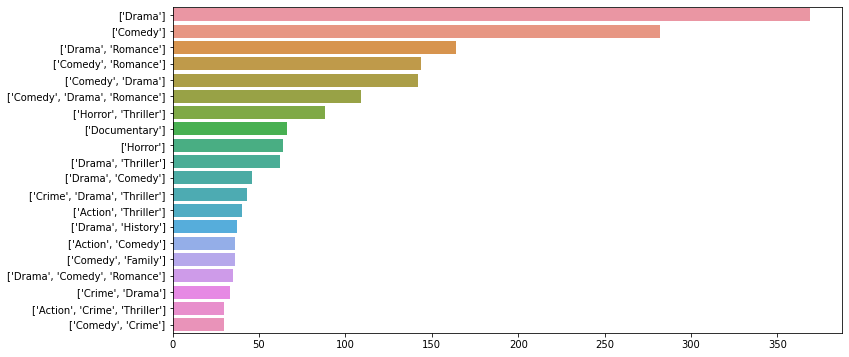

Bar Chart for keywords column


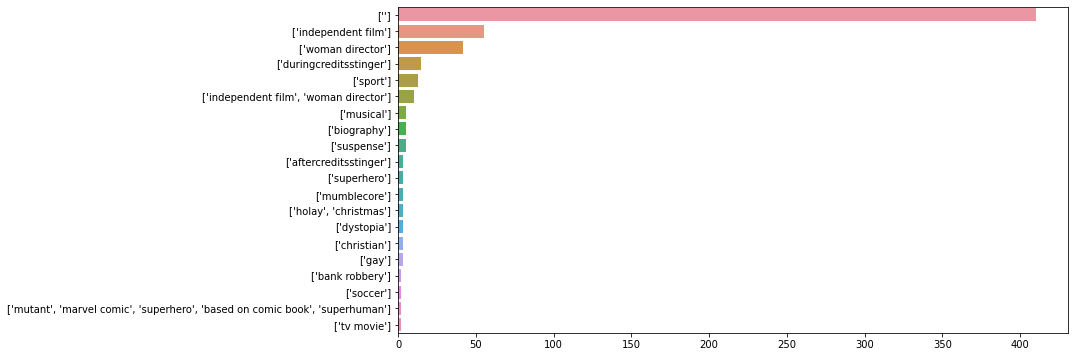

Bar Chart for original_language column


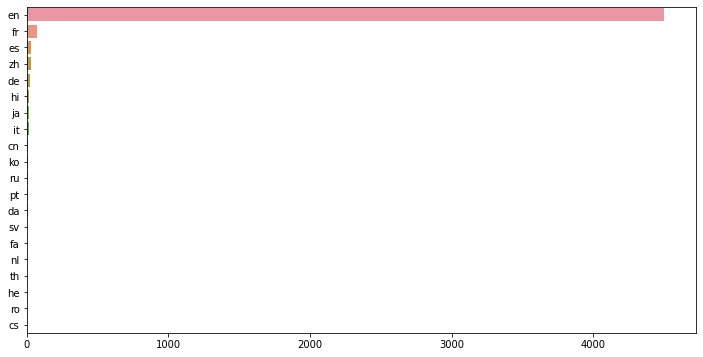

Bar Chart for production_companies column


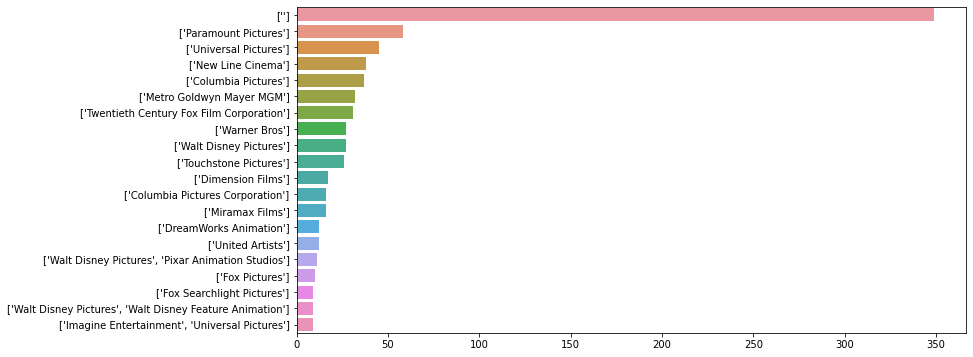

Bar Chart for production_countries column


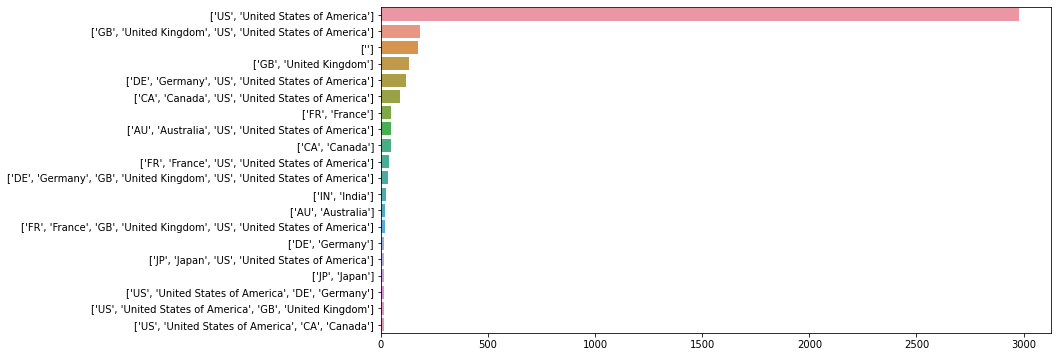

In [11]:
for col in cat_cols[['genres', 'keywords', 'original_language', 'production_companies', 'production_countries']].columns:
    val_cnt = cat_cols[col].value_counts()[:20]
    print(f'Bar Chart for {col} column')
    plt.figure(figsize=(12,6))
    sns.barplot(x=val_cnt.values, y=val_cnt.index)
    plt.show()

In [12]:
## CONCLUSION: The 

Histogram Chart for budget column


<Figure size 864x432 with 0 Axes>

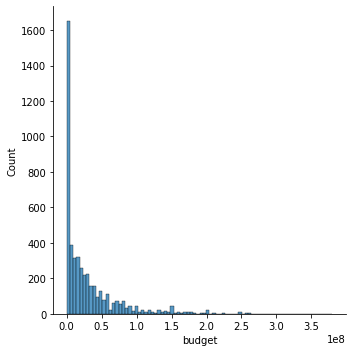

Histogram Chart for popularity column


<Figure size 864x432 with 0 Axes>

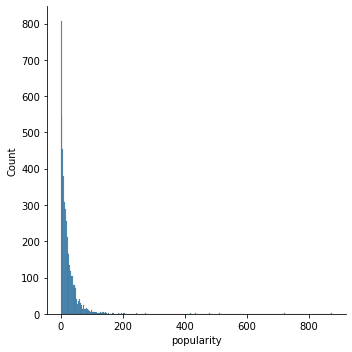

Histogram Chart for revenue column


<Figure size 864x432 with 0 Axes>

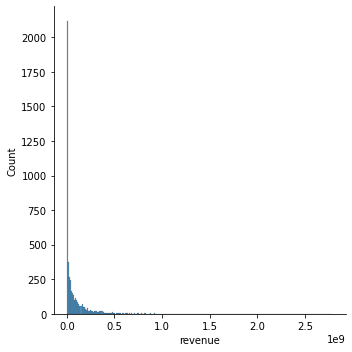

Histogram Chart for runtime column


<Figure size 864x432 with 0 Axes>

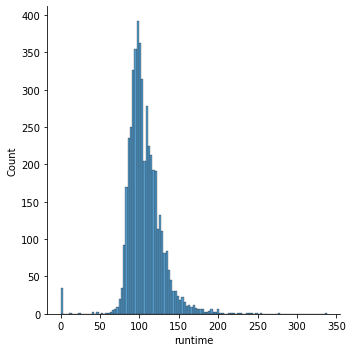

Histogram Chart for vote_count column


<Figure size 864x432 with 0 Axes>

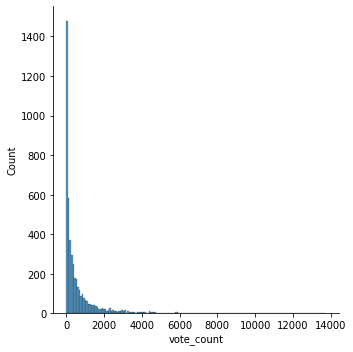

Histogram Chart for Profit column


<Figure size 864x432 with 0 Axes>

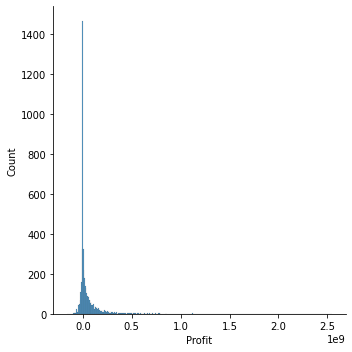

In [13]:
for col in num_cols.columns:
    val_cnt = num_cols[col].value_counts()
    print(f'Histogram Chart for {col} column')
    plt.figure(figsize=(12,6))
    sns.displot(x=num_cols[col]);
    plt.show();

Boxplot Chart for budget column


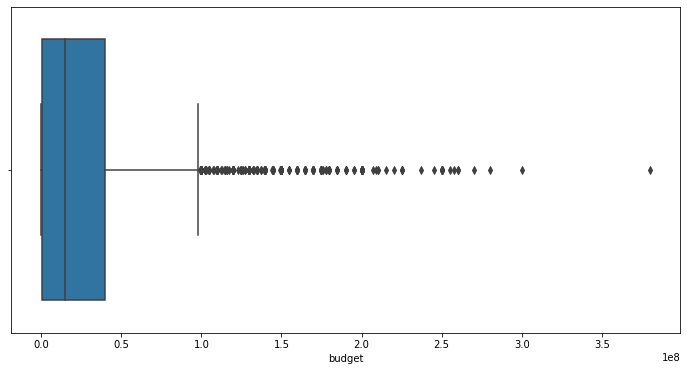

Boxplot Chart for popularity column


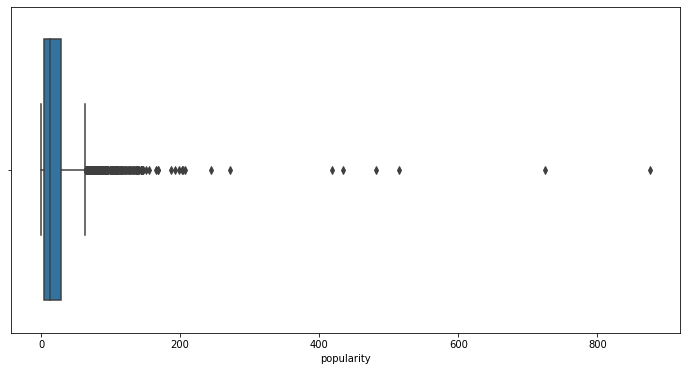

Boxplot Chart for revenue column


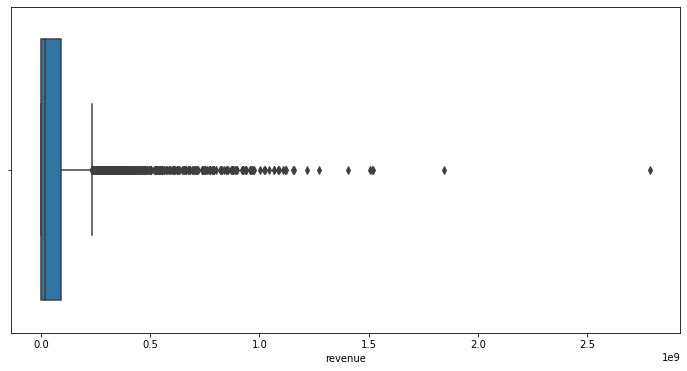

Boxplot Chart for runtime column


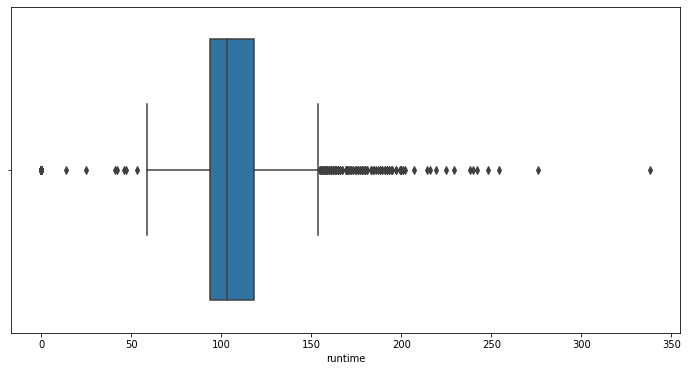

Boxplot Chart for vote_count column


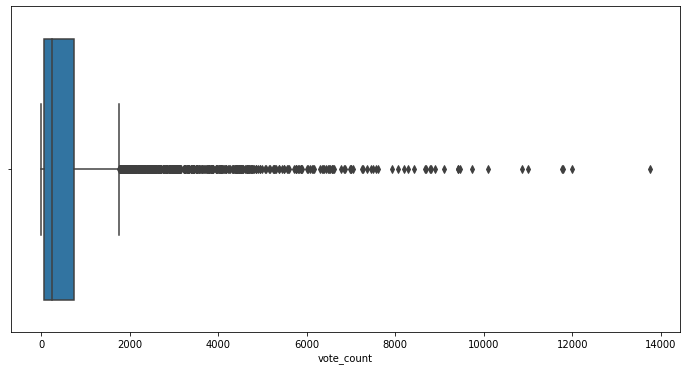

Boxplot Chart for Profit column


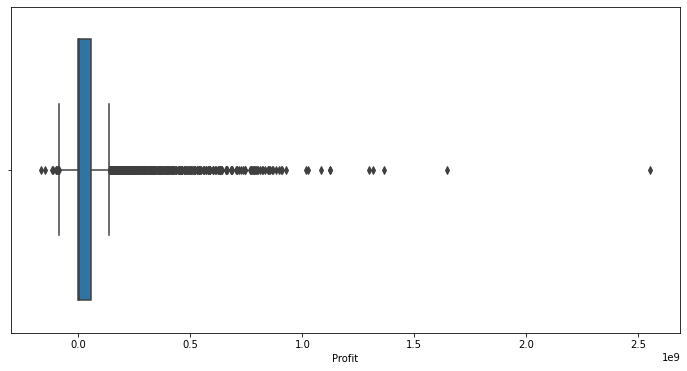

In [14]:
for col in num_cols.columns:
    val_cnt = num_cols[col].value_counts()
    print(f'Boxplot Chart for {col} column')
    plt.figure(figsize=(12,6))
    sns.boxplot(x=num_cols[col]);
    plt.show();

Density Plot for budget column


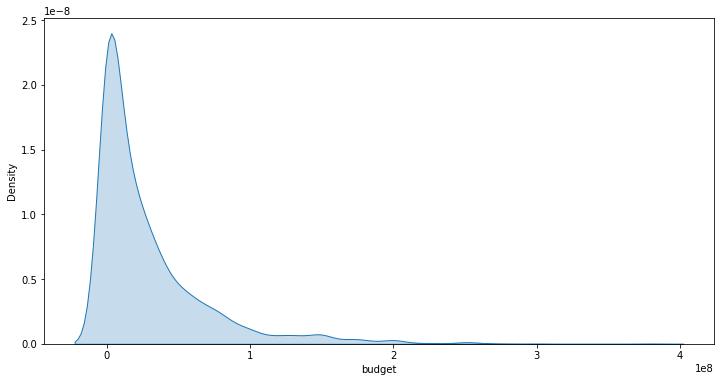

Density Plot for popularity column


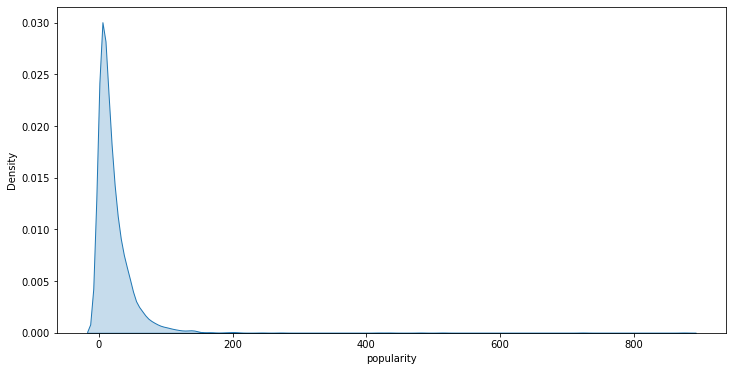

Density Plot for revenue column


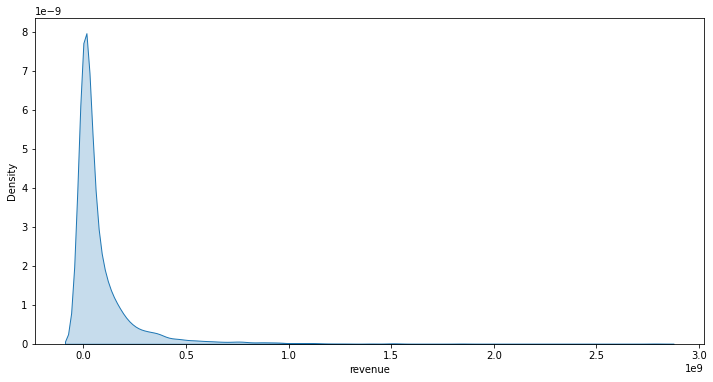

Density Plot for runtime column


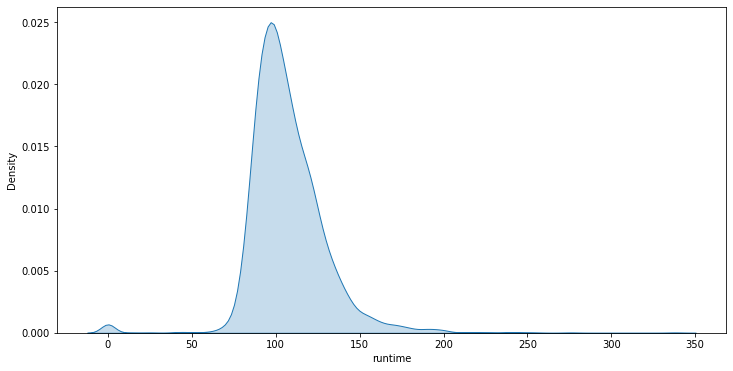

Density Plot for vote_count column


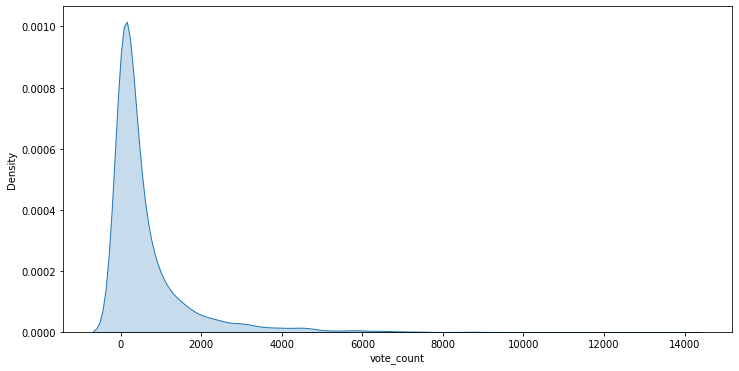

Density Plot for Profit column


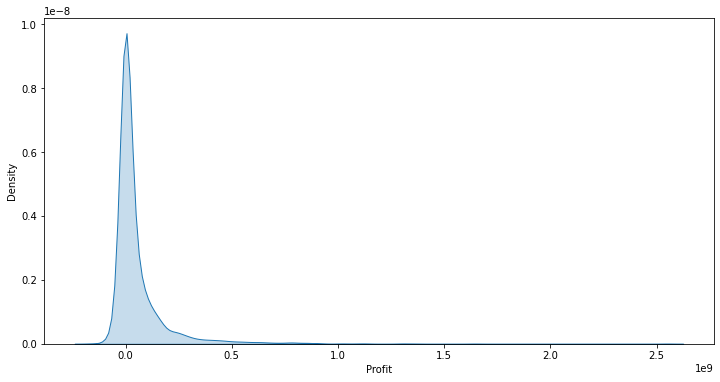

In [15]:
for col in num_cols.columns:
    val_cnt = num_cols[col].value_counts()
    print(f'Density Plot for {col} column')
    plt.figure(figsize=(12,6))
    sns.kdeplot(x=num_cols[col], shade=True);
    plt.show();

In [16]:
df.columns

Index(['budget', 'genres', 'keywords', 'original_language', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'tagline', 'title', 'vote_count',
       'Profit'],
      dtype='object')